In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

C:\Users\Zack\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: low >= high

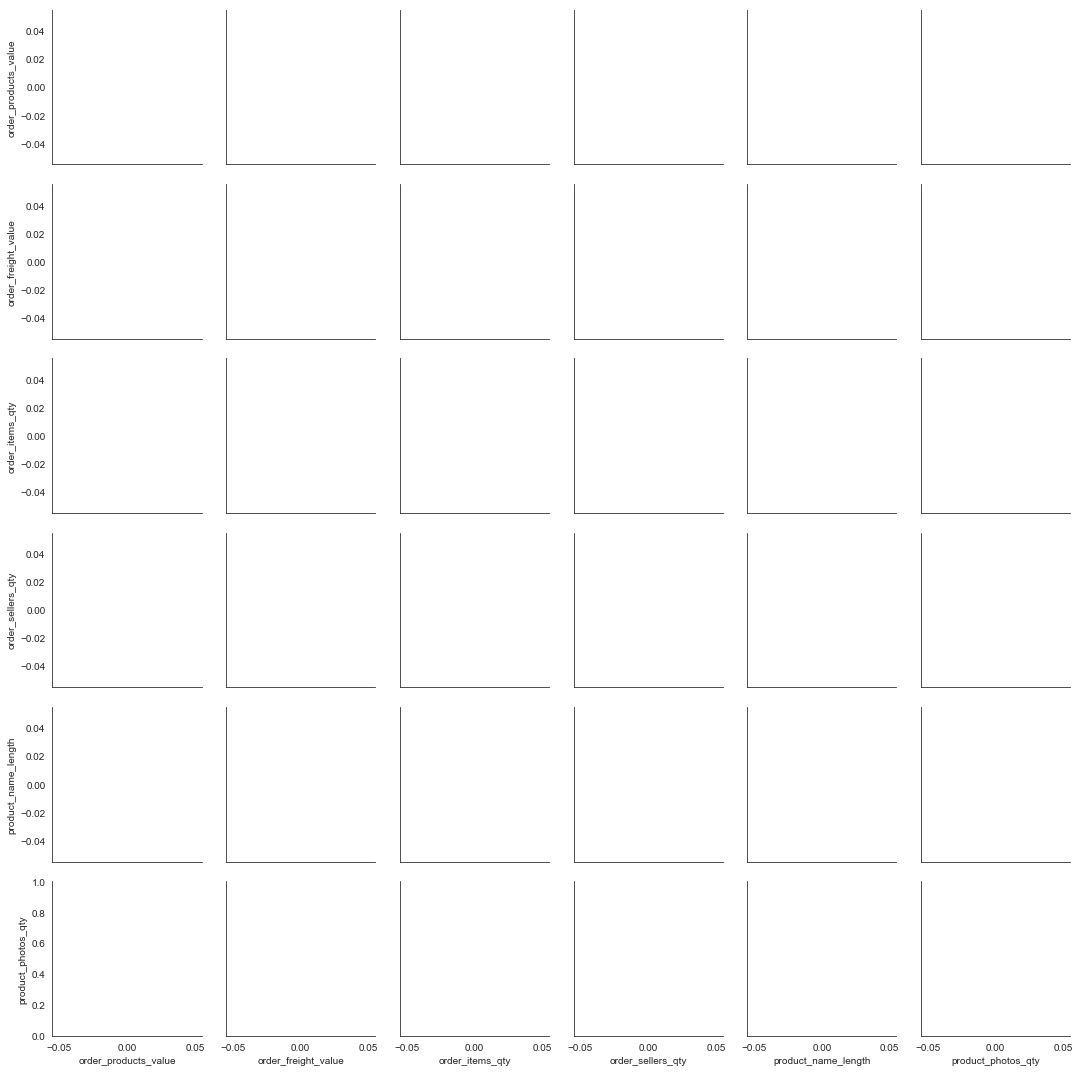

In [3]:
#Make the scatterplot matrix

df = pd.read_csv('olist_classified_public_dataset.csv')

#Take a subset of the data to make plots clearer.
df_ord = df.loc[
    ((df['order_status'] == 'delivered') | (df['order_status'] =='shipped')),
    ['order_status', 'order_products_value', 'order_freight_value', 'order_items_qty', 'order_sellers_qty', 'product_name_length', 'product_photos_qty']
]

#Make a copy of the data to add jitter to and plot.
df_jittered = df_ord.loc[:, 'order_products_value':'product_photos_qty'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot
g.map_upper(plt.scatter, alpha=.5)
#fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate disctributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up beacsue the plot does not include a legend. 